## Problem Statment= To Detect The Credit Card Fraud Transactions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('F:\IMARTICUS\python data sets\creditcard.csv')

In [45]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
data.shape

(284807, 31)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [17]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


C:\Users\sarvadnya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarvadnya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarvadnya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

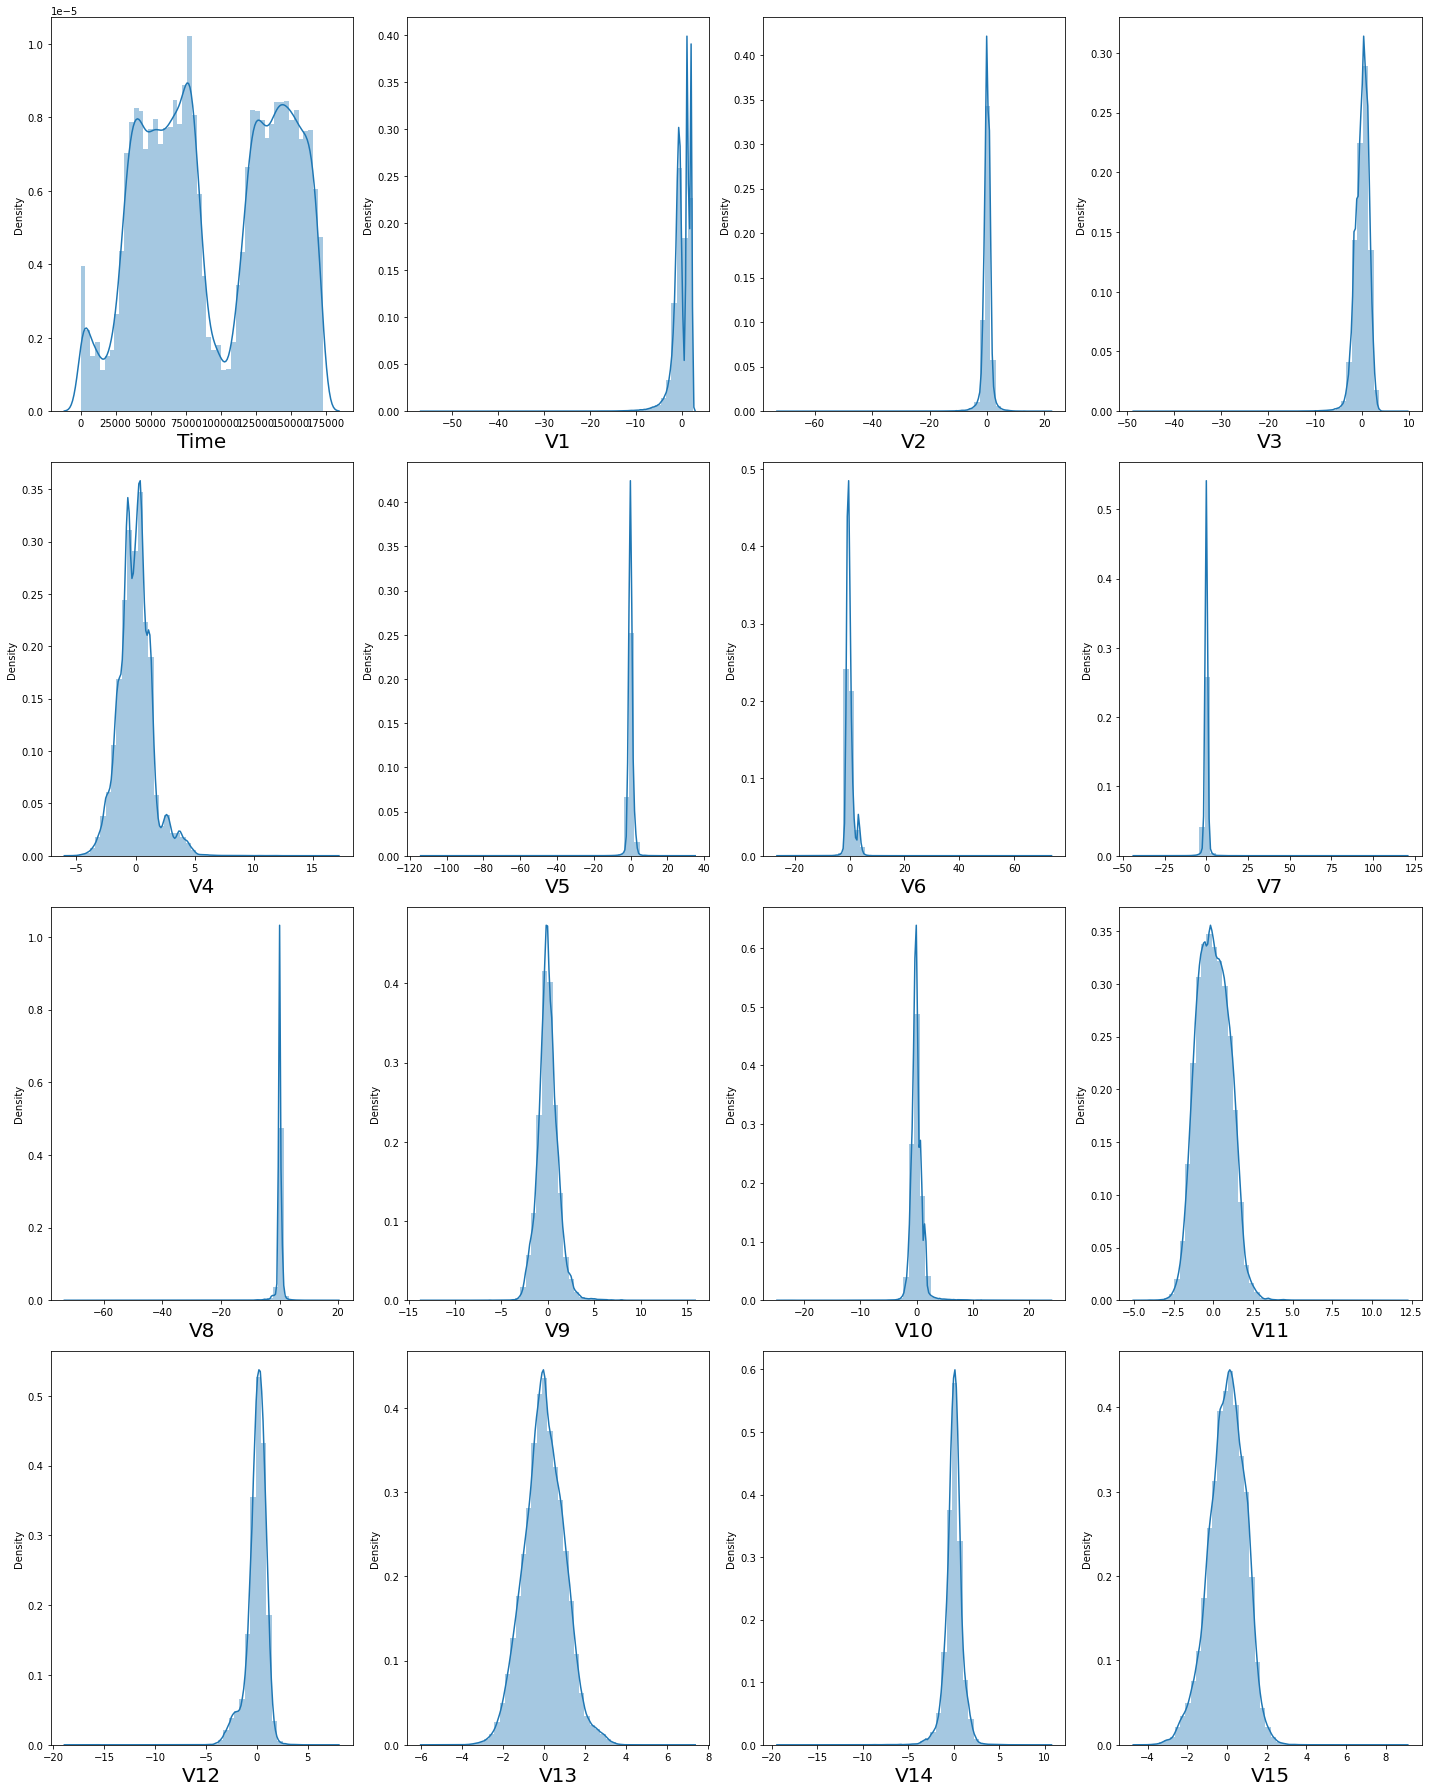

In [3]:
#let's see the how data is distributed for  every column
plt.figure(figsize=(20,25),facecolor='White')
plotnumber=1
for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('salary',fontsixze)
    plotnumber+=1 
plt.tight_layout()    

### Conclusion=Data follows normal distribution

In [4]:
fraud=data.loc[data['Class']==1]    #print the data that have a fraud case 
normal=data.loc[data['Class']==0]   #print the data that have not a fraud case

In [5]:
len(fraud)    #give the no. of fraud caese

492

In [6]:
len(normal) #give the no. of  not fraud caese

284315

In [26]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## unber-sampling

In [ ]:
#build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions


In [7]:
normal_sample=normal.sample(n=492)

In [8]:
#concatinating 2 dataFrame
new_dataset=pd.concat([normal_sample,fraud],axis=0)    #axis=0 means the data is attach in row wise

In [9]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
220424,142161.0,1.919004,-0.027168,-1.861887,1.322601,0.599200,-0.686906,0.629355,-0.301788,0.277505,...,0.072079,0.223034,-0.022304,0.664386,0.440645,-0.524852,-0.035777,-0.045728,72.60,0
136340,81657.0,-2.155718,1.805114,0.149724,-0.614140,-1.176974,-0.892422,-0.576635,0.973941,-0.367226,...,0.255081,0.003716,0.146938,0.464673,-0.323655,0.844538,-1.382840,-0.153149,7.68,0
84222,60211.0,1.408183,-1.568957,1.525322,-0.882837,-2.168177,0.601670,-1.905229,0.190348,-0.346008,...,-0.278475,0.116139,-0.107613,-0.046989,0.500338,-0.018922,0.120951,0.032417,24.90,0
135610,81327.0,-1.253035,1.580813,0.709902,1.238341,-0.381912,0.277427,-0.204924,1.059292,-0.850748,...,0.118156,0.374178,-0.074602,0.034375,-0.082118,-0.249444,0.045443,0.058896,6.97,0
228154,145380.0,2.351522,-1.281384,-1.162132,-1.647484,-0.950884,-0.510370,-1.053228,-0.200066,-1.234165,...,-0.200247,-0.057153,0.235594,0.456298,-0.102525,-0.177069,0.005818,-0.049013,5.00,0


In [12]:
new_dataset['Class'].value_counts()  

0    492
1    492
Name: Class, dtype: int64

In [13]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92060.819106,-0.111942,-0.000687,0.047412,-0.026290,0.091001,0.042106,-0.011372,-0.015998,0.022082,...,0.065975,0.019381,-0.040987,-0.003049,-0.006647,0.053364,-0.046633,0.005851,-0.006607,94.107947
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Sampling (split the data into Train and Test)

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [15]:
x=new_dataset.iloc[:,0:30]        #featrures
y=new_dataset.iloc[:,30]          #target veriable (Class)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=2)      #split the data into training data and test data

In [26]:
#strartify is used to defind the class feature the 0 and 1 are defind equal
#random state mean how you want to split the data 

In [27]:
y_train.value_counts()

0    344
1    344
Name: Class, dtype: int64

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(688, 30)
(296, 30)
(688,)
(296,)


In [29]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [30]:
#training the logistic regression model with training data
logreg.fit(x_train,y_train)

LogisticRegression()

## Model Evaluation

In [38]:
#Accuracy On Training Data
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
x_train_prediction=logreg.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)


In [39]:
print("the accuracy of train data is====>",training_data_accuracy)

the accuracy of train data is====> 0.9462209302325582


In [40]:
#Accuracy On Test Data
x_test_prediction=logreg.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [42]:
print('the accuracy of test data is ====>',test_data_accuracy)

the accuracy of test data is ====> 0.902027027027027


In [46]:
#prediction on test data
prd_test=logreg.predict(x_test)
print(prd_test)

[1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1
 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1
 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0]


In [47]:
from sklearn.metrics import confusion_matrix
Conf_LogR=confusion_matrix (y_test,prd_test)
Conf_LogR

array([[140,   8],
       [ 21, 127]], dtype=int64)

In [50]:
#Overall Accuracy :
Acc_LogR=Conf_LogR.diagonal().sum()/Conf_LogR.sum()*100
Acc_LogR


90.2027027027027